# distributionViz
A notebook to visualize differences in distributions of obs from Landsat and Sentinel 2

## Primary POCs

Ian Housman- ian.housman@usda.gov

Robert Chastain- robert.chastain@usda.gov


In [1]:
import pandas as pd
import matplotlib,os,sys,glob
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
print('done')

done


In [5]:
#Set up two sets of csv tables
#These are assumed to be from geeViz's pheenoViz tool

#Specify a dictionary of folders containing tables for each histogram
#No limit on how many different types can be specified
# folders_dict= {'Clean':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_clean_lake_combo_160_280_32\tables',
#             ],
#                'Algal Bloom':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_dirty_big_sandy_160_280_32\tables',
#                        r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_dirty_keyhole_160_280_32\tables'],
              
#                'Turbid':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_murky_lake_combo_160_280_32\tables',
#                        r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_murky_lake_combo2_160_280\tables']
#               }

folder_dict = {
            'WY Dirty':[r'C:\PheenoViz_Outputs\wy_dirty_buffalo_bill_boysen_viva_naughton_pathfinder_lakes\tables'],
              'WY Clean':[r'C:\PheenoViz_Outputs\wy_clean_lake_combo2\tables'],
    'WY Merky':[r'C:\PheenoViz_Outputs\wy_merky_ocean_big_sandy_eden_lakes\tables'],
    'WY Dark Bloom':[r'C:\PheenoViz_Outputs\wy_dark_bloom_flaming_gorge_rob_roy_half_moon\tables'],
    'WY Glacial Till':[r'C:\PheenoViz_Outputs\wy_glacial_till_12\tables'],
}
#Specify which bands to use  
#These bands need to be available in the specified tables folders above
whichBands = ['NDGI','blue','green','brightness','greenness','wetness','tcAngleBG']           

#Provide a color for each type specified above
colors_dict = {'WY Dirty':'#FF0000','WY Clean':'#0000FF','WY Merky':'#00FF00','WY Dark Bloom':'#888888','WY Glacial Till':'#00FFFF'}

#Provide an output folder for histograms
output_dir = r'C:\PheenoViz_Outputs\distributionViz'

#Provide a name for the run for the histograms
run_name = 'WY Full Comparison '

#Specify number of bins in histogram
nBins = 100

#Specify year. Set to '*' if all years are wanted
year = 2021
#######################################################
if not os.path.exists(output_dir):os.makedirs(output_dir)
print(folder_dict)

{'WY Dirty': ['C:\\PheenoViz_Outputs\\wy_dirty_buffalo_bill_boysen_viva_naughton_pathfinder_lakes\\tables'], 'WY Clean': ['C:\\PheenoViz_Outputs\\wy_clean_lake_combo2\\tables'], 'WY Merky': ['C:\\PheenoViz_Outputs\\wy_merky_ocean_big_sandy_eden_lakes\\tables'], 'WY Dark Bloom': ['C:\\PheenoViz_Outputs\\wy_dark_bloom_flaming_gorge_rob_roy_half_moon\\tables'], 'WY Glacial Till': ['C:\\PheenoViz_Outputs\\wy_glacial_till_12\\tables']}


{'WY Dirty': ['C:\\PheenoViz_Outputs\\wy_dirty_buffalo_bill_boysen_viva_naughton_pathfinder_lakes\\tables'], 'WY Clean': ['C:\\PheenoViz_Outputs\\wy_clean_lake_combo2\\tables'], 'WY Merky': ['C:\\PheenoViz_Outputs\\wy_merky_ocean_big_sandy_eden_lakes\\tables'], 'WY Dark Bloom': ['C:\\PheenoViz_Outputs\\wy_dark_bloom_flaming_gorge_rob_roy_half_moon\\tables'], 'WY Glacial Till': ['C:\\PheenoViz_Outputs\\wy_glacial_till_12\\tables']}
Reading in tables for: NDGI WY Dirty
WY Dirty NDGI 2021 ['C:\\PheenoViz_Outputs\\wy_dirty_buffalo_bill_boysen_viva_naughton_pathfinder_lakes\\tables\\wy_dirty_buffalo_bill_boysen_viva_naughton_pathfinder_lakes_Sentinel2_2021_196-258_16_5000_NDGI.csv']
Reading in tables for: NDGI WY Clean
WY Clean NDGI 2021 ['C:\\PheenoViz_Outputs\\wy_clean_lake_combo2\\tables\\wy_clean_lake_combo2_Sentinel2_2021_196-258_16_5000_NDGI.csv']
Reading in tables for: NDGI WY Merky
WY Merky NDGI 2021 ['C:\\PheenoViz_Outputs\\wy_merky_ocean_big_sandy_eden_lakes\\tables\\wy_merky_ocea

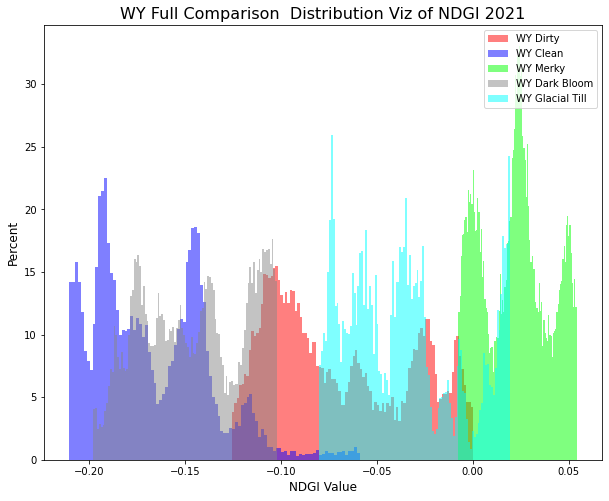

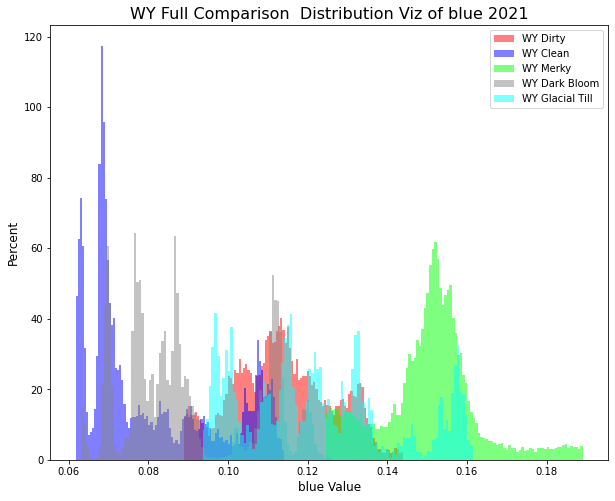

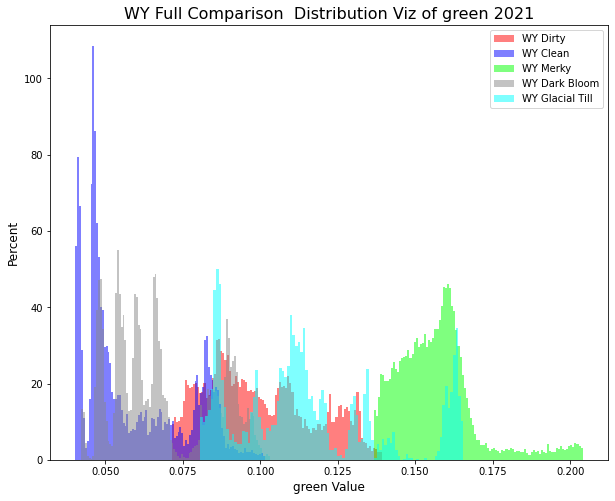

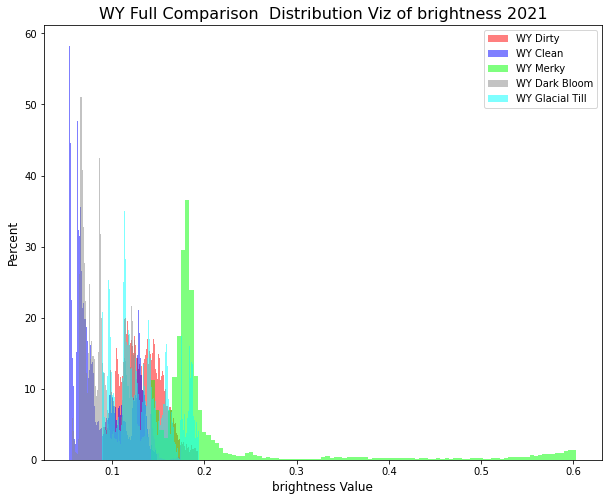

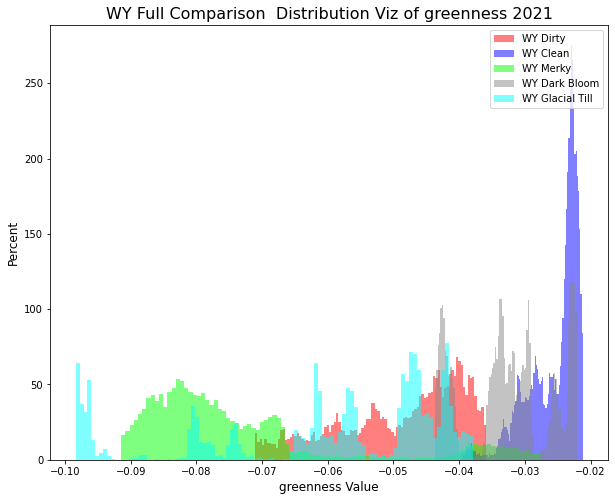

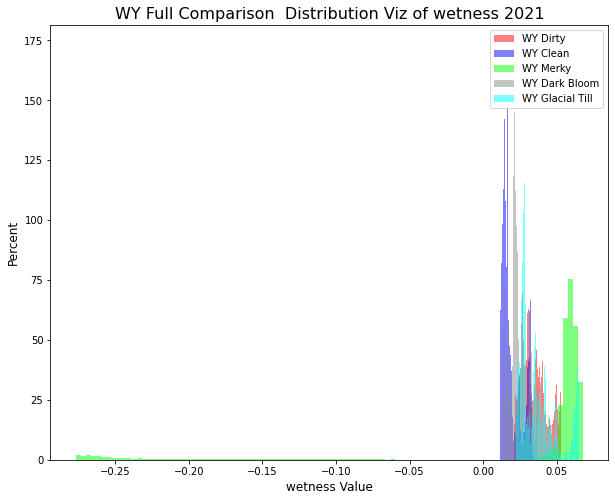

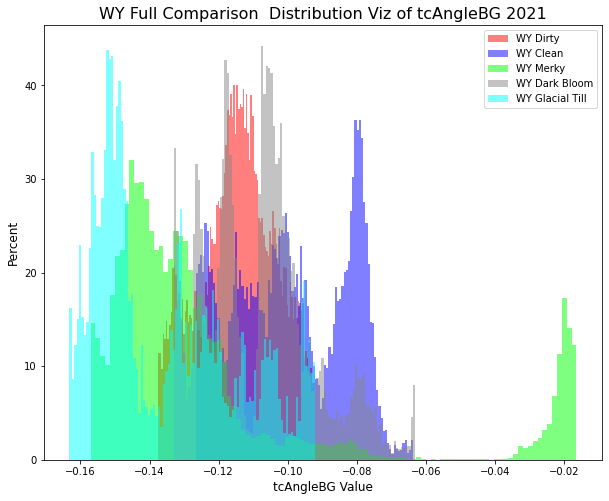

In [8]:
def getHistograms(folder_dict,whichBands,colors_dict,output_dir,run_name,nBins=100,year = '*'):
    #Read in tables
    tables = {}
    #Iterate across each band
    for band in whichBands:
        band_tables = {}
        #Iterate across each type
        for key in folder_dict.keys():
            print('Reading in tables for: {} {}'.format(band,key))
            folders = folder_dict[key]
            li = []
            #Get the csvs and read in valid values into a single long list
            for folder in folders:
                csvs = glob.glob(os.path.join(folder,'*_{}_*{}.csv'.format(year,band)))
                print(key,band,year,csvs)
                for csv in csvs:
#                     print(csv)
                    df = pd.read_csv(csv, index_col=None, header=0).to_numpy().flatten()
                    df = df[~np.isnan(df)]

                    li.append(df)

            li = np.concatenate(li)
            #Get rid of extreme outliers
            min,max = np.percentile(li,[5,95])
            li = li[(li > min) & (li < max)]#np.clip(li,min,max)

            band_tables[key] = li

        tables[band] = band_tables
    print(tables)
    
    if year == '*':
        year_label = ''
    else:
        year_label = year
    #Make histograms
    for band in whichBands:
        plt.figure(figsize=(10,8))

        tables_band = tables[band]
        for key in tables_band.keys():
            plt.hist(tables_band[key], bins=nBins, alpha=0.5, density=True,label=key,color = colors_dict[key],stacked=True)
        plt.xlabel("{} Value".format(band), size=12)
        plt.ylabel("Percent", size=12)
        plt.title("{} Distribution Viz of {} {}".format(run_name,band,year_label), size=16)
        plt.legend(loc='upper right')
        plt.savefig(os.path.join(output_dir,'{}_{}_{}.png'.format(run_name,year_label,band)))
#############################################################
print(folder_dict)
getHistograms(folder_dict,whichBands,colors_dict,output_dir,run_name,nBins,year)

Reading in tables for: NDGI WY Dirty
Reading in tables for: NDGI WY Clean
Reading in tables for: NDGI WY Merky
Reading in tables for: NDGI WY Dark Bloom
Reading in tables for: NDGI WY Glacial Till
Reading in tables for: blue WY Dirty
Reading in tables for: blue WY Clean
Reading in tables for: blue WY Merky
Reading in tables for: blue WY Dark Bloom
Reading in tables for: blue WY Glacial Till
Reading in tables for: green WY Dirty
Reading in tables for: green WY Clean
Reading in tables for: green WY Merky
Reading in tables for: green WY Dark Bloom
Reading in tables for: green WY Glacial Till
Reading in tables for: brightness WY Dirty
Reading in tables for: brightness WY Clean
Reading in tables for: brightness WY Merky
Reading in tables for: brightness WY Dark Bloom
Reading in tables for: brightness WY Glacial Till
Reading in tables for: greenness WY Dirty
Reading in tables for: greenness WY Clean
Reading in tables for: greenness WY Merky
Reading in tables for: greenness WY Dark Bloom
Read

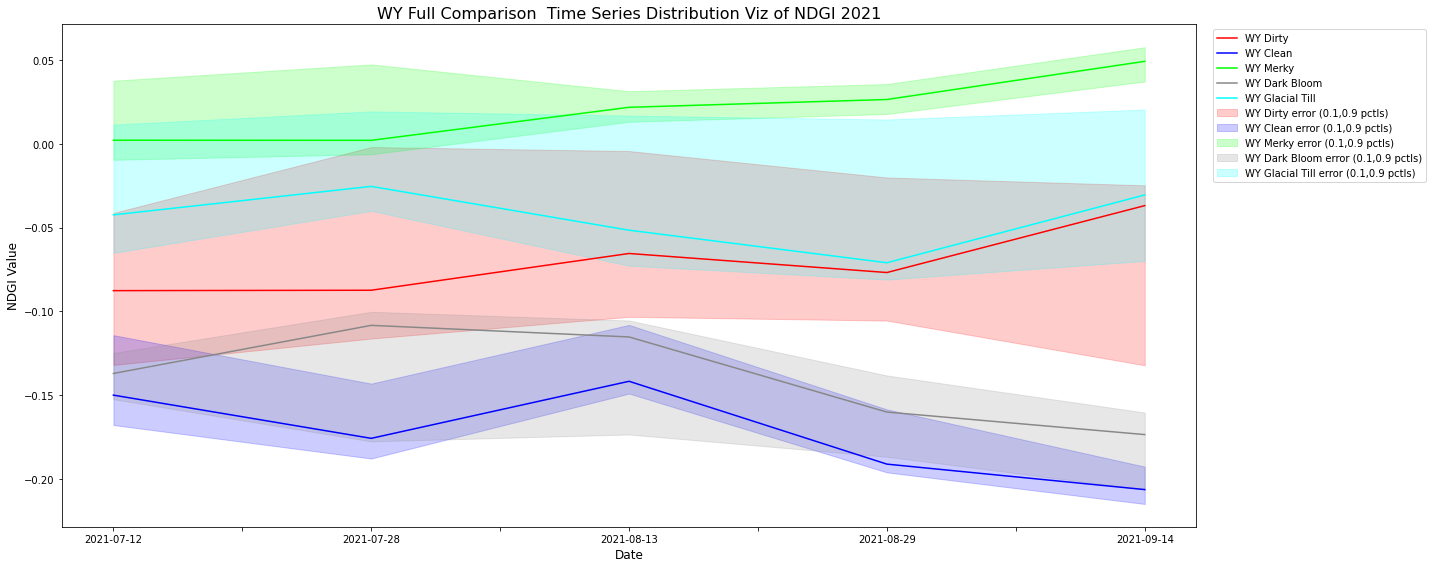

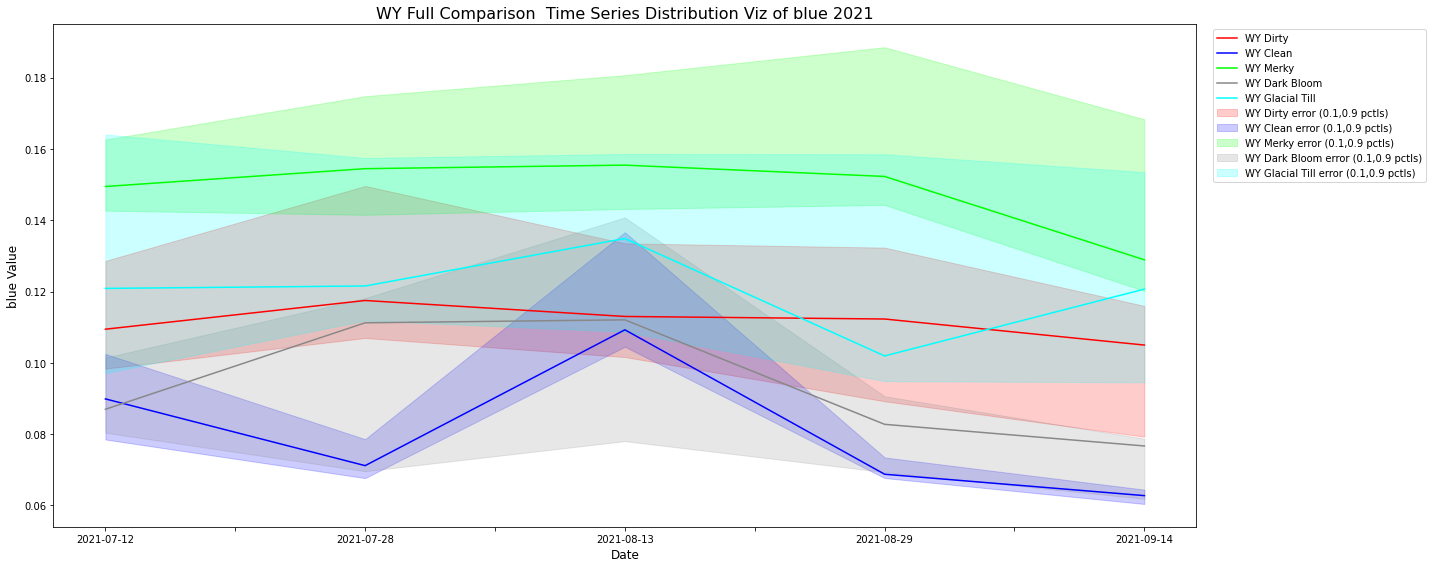

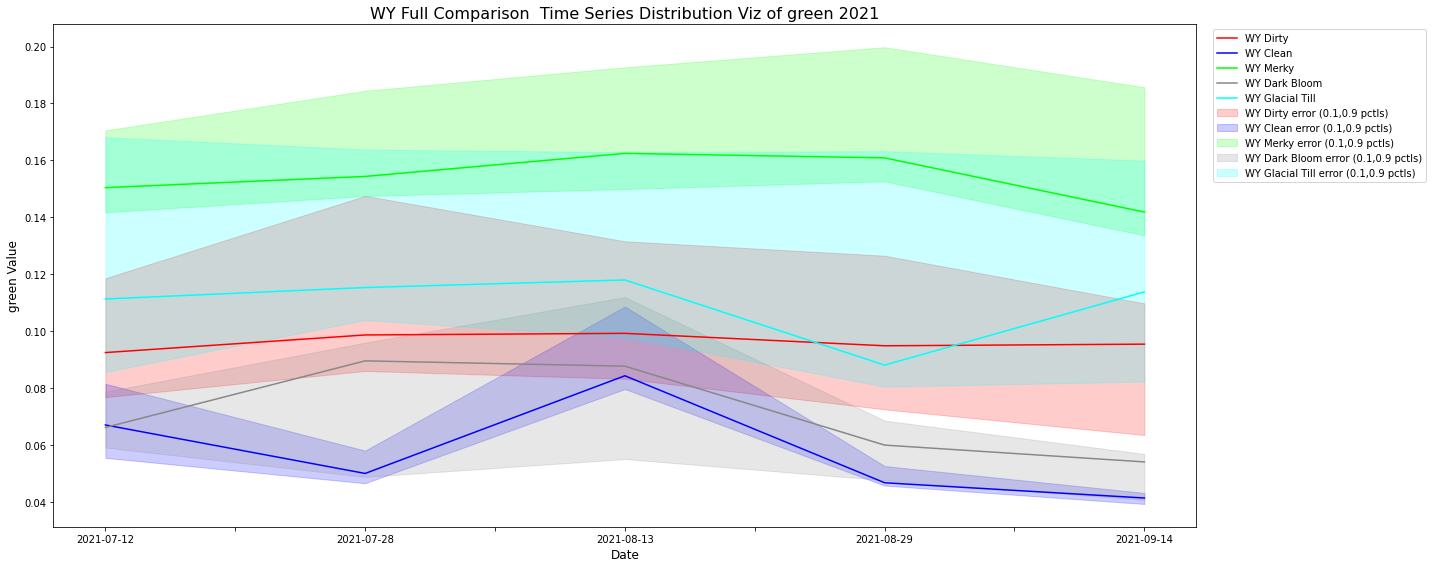

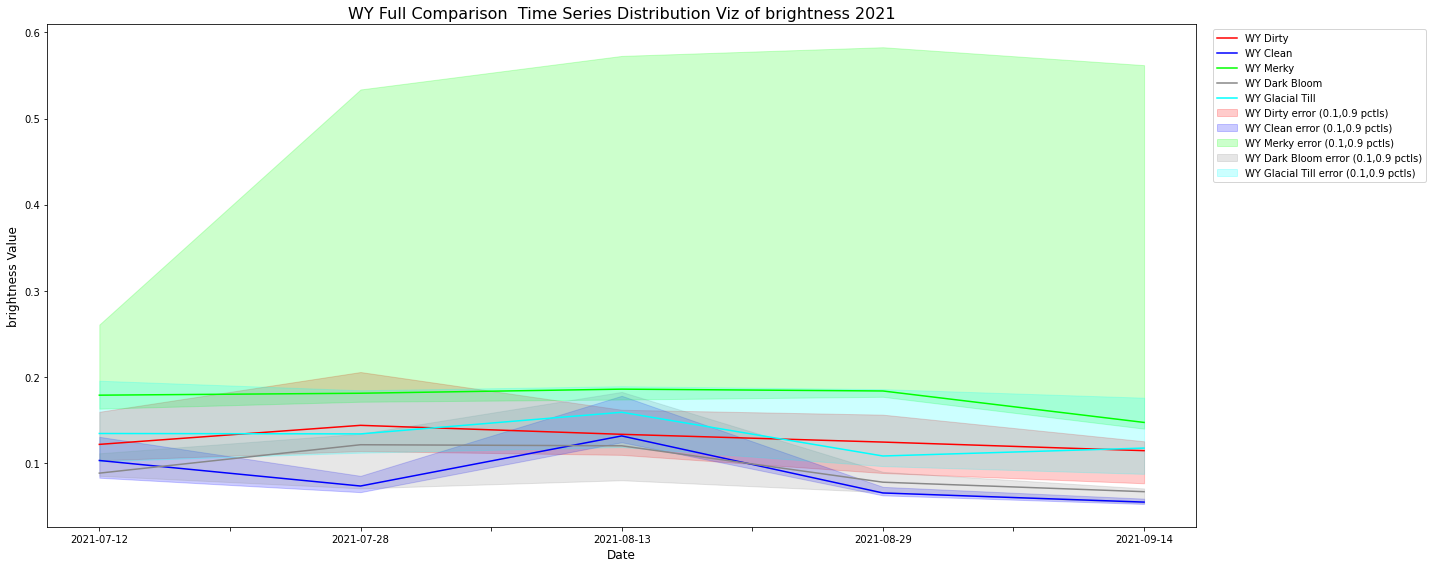

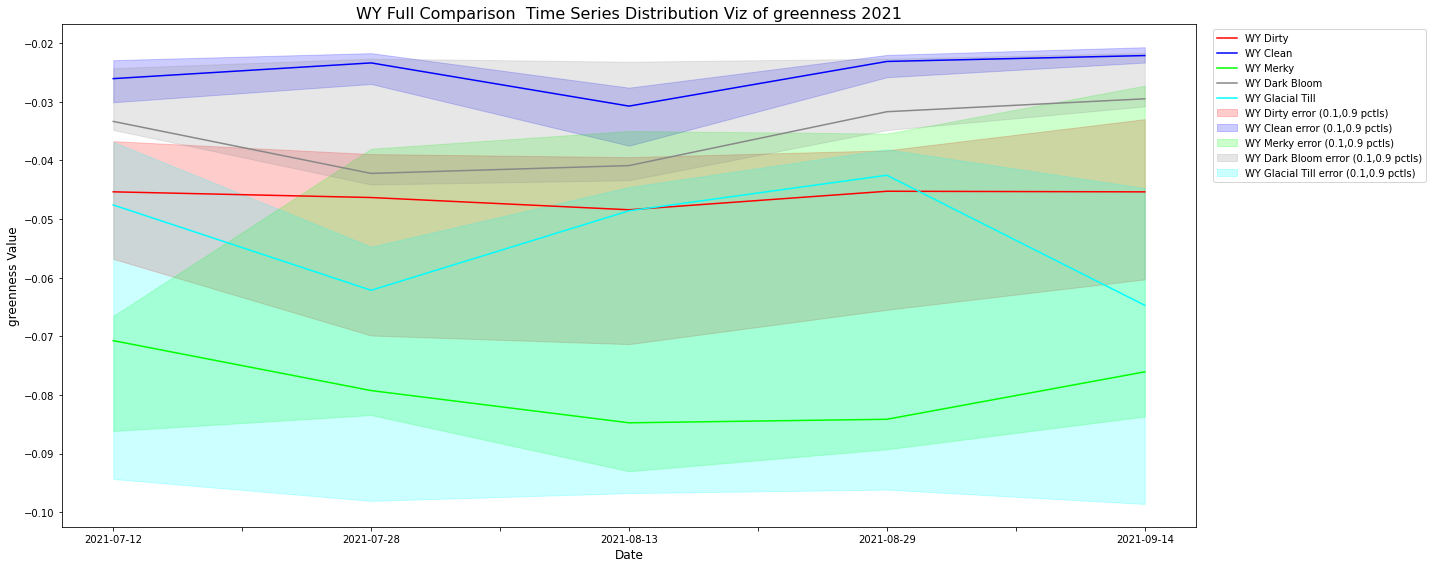

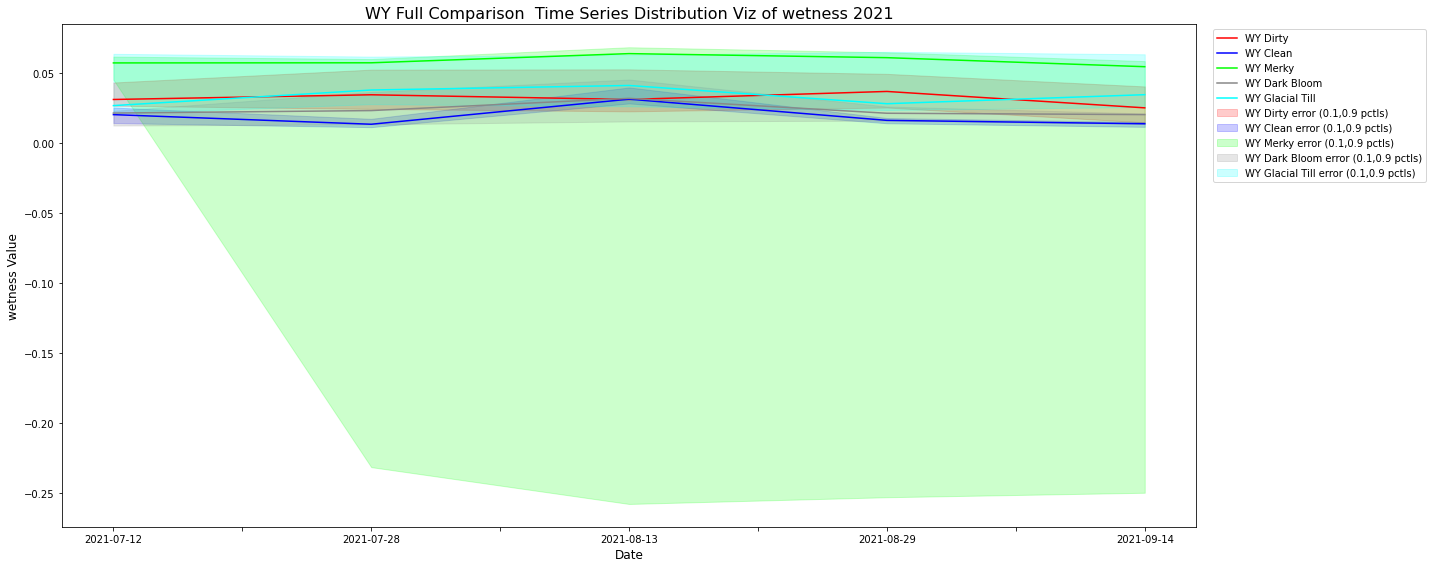

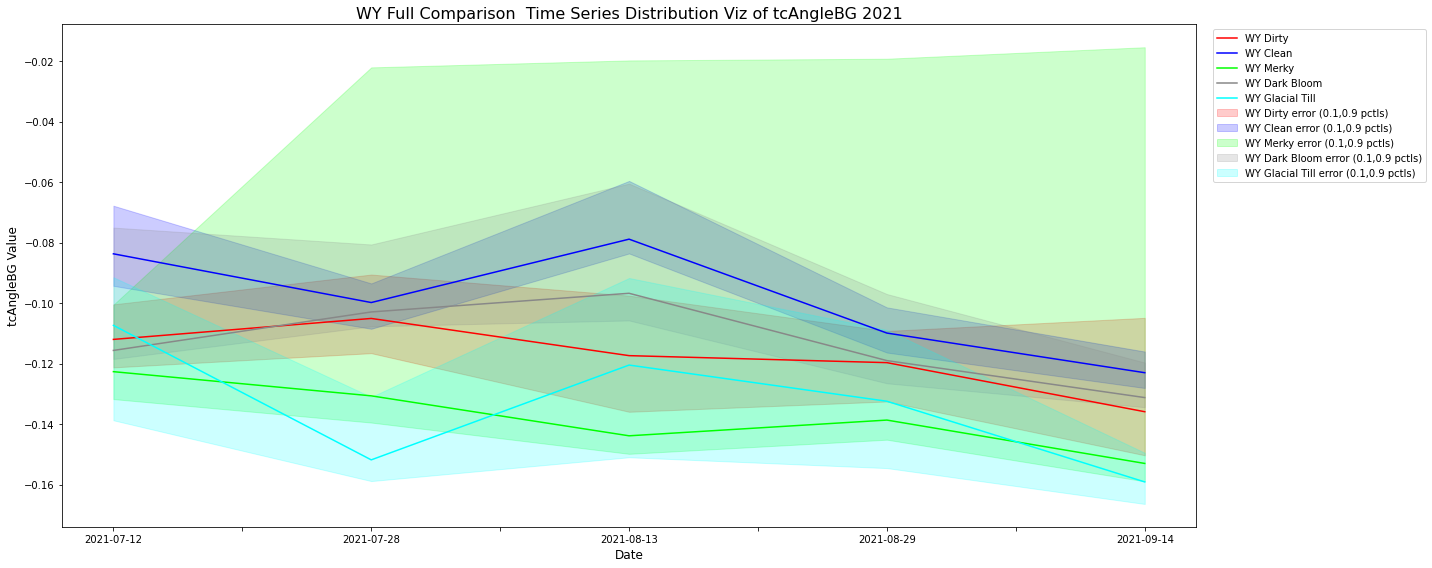

In [9]:
percentiles = [0.1,0.5,0.90] # Must be a min, middle, max (must be exactly 3)
for band in whichBands:
    band_tables = {}
    #Iterate across each type
    for key in folder_dict.keys():
        print('Reading in tables for: {} {}'.format(band,key))
        folders = folder_dict[key]
        li = []
        #Get the csvs and read in valid values into a single long list
        for folder in folders:
            csvs = glob.glob(os.path.join(folder,'*_{}_*{}.csv'.format(year,band)))
#             print(band,year,csvs)
            for csv in csvs:
    #                     print(csv)
                df = pd.read_csv(csv, index_col=None, header=0)
                li.append(df)
            li = pd.concat(li, axis=0)
            quantiles = li.quantile(q = percentiles)
            band_tables[key] = quantiles
    plt.figure(figsize=(20,8))      
    ax = plt.gca()
    
    for key in band_tables.keys():
        t = band_tables[key]

        t.iloc[1].plot(ax = ax,label='{}'.format(key),color = colors_dict[key])
     
        plt.fill_between(t.columns, t.iloc[0], t.iloc[2], color=colors_dict[key], alpha=0.2, label='{} error ({},{} pctls)'.format(key,percentiles[0],percentiles[2]))
        
    if year == '*':
        year_label = ''
    else:
        year_label = year
    plt.ylabel("{} Value".format(band), size=12)
    plt.xlabel("Date", size=12)
    plt.title("{} Time Series Distribution Viz of {} {}".format(run_name,band,year_label), size=16)
#     plt.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
    plt.tight_layout()
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.savefig(os.path.join(output_dir,'{}_time_series_{}_{}.png'.format(run_name,year_label,band)))